### Analysis of trends across broader philosophy topics for english language

In [18]:
#Define broader philosopical ideas (used chat gpt along with personal research on Wikipedia pages to build these categories)
philosophical_clusters = {
    'Metaphysics': [
        'Empiricism', 'Epistemology', 'Metaphysics', 'Logical positivism', 'Phenomenology (philosophy)',
        'Determinism', 'Dialectical materialism', 'Holism', 'Monism', 'Ontology', 'Philosophy of mind',
        'Rationalism', 'Teleology', 'Vitalism'
    ],
    'Ethics_and_Morality': [
        'Ethics', 'Consequentialism', 'Egalitarianism', 'Free will', 'Nihilism', 'Utilitarianism', 'Categorical imperative'
    ],
    'Political_Thought': [
        'Communism', 'Capitalism', 'Conservatism', 'Liberalism', 'Socialism', 'Authoritarianism', 'Populism',
        'Leninism', 'Nazism', 'Maoism', 'Marxism', 'Juche', 'Libertarianism', 'Neoliberalism', 'Anarchism',
        'Individualism',
    ],
    'Religion_and_Spirituality': [
        'Agnosticism', 'Atheism', 'Baptism', 'Baptists', 'Gnosticism', 'Henotheism', 'Kabbalah',
        'Paganism', 'Pantheism', 'Satanism', 'Shamanism', 'Sikhism', 'Theism', 'Rastafari', 'Theology',
        'Zen', 'Zoroastrianism', 'Ecumenism', 'Deism', 'Philosophy of religion', 'Fatalism', 'Fundamentalism',
        'Manichaeism', 'Mysticism', 'New Age', 'Personalism'
    ],
    'Classical_Philosophy': [
        'Platonism', 'Stoicism', 'Cynicism (philosophy)', 'Socrates', 'Idealism', 'Philosophical realism',
        'Medieval philosophy', 'Neoplatonism', 'Romanticism', 'Scholasticism', 'Thomism'
    ],
    'Western_Philosophy': [
        'Continental philosophy', 'Structuralism', 'Dialectic',
    ],
    'Social_Philosophies': [
        'Philosophy of law', 'Feminist philosophy', 'Hedonism', 'Behaviorism',
    ],
    'Eastern_Philosophies': [
        'Asceticism', 'Hermeticism', 'Luddite','Jainism', 'Taoism'
    ],
    'Contemporary_Philosophies': [
        'Existentialism', 'Materialism', 'Post-structuralism', 'Critical theory',
    ],
    'Science_philosophies': [
        'Analytic philosophy', 'Philosophy of language', 'Philosophy of science', 'Reductionism', 'Relativism',
        'Scientism', 'Transhumanism', 'Vienna Circle'
    ]
}


In [19]:
# Load data 
import pandas as pd
import numpy as np

# Load data for english wikipedia
views = pd.read_csv('data/df_en.csv')
views['timestamp'] = pd.to_datetime(views['timestamp'], format = '%Y%m%d%H')
views

,timestamp,Aesthetics,Agnosticism,Analytic philosophy,Anarchism,Anarchy,Animism,Asceticism,Atheism,Authoritarianism,...,Teleology,Theism,Theology,Thomism,Transhumanism,Utilitarianism,Vienna Circle,Vitalism,Zen,Zoroastrianism
0,2019-01-01,1736.0,3413.0,684.0,1820.0,1495.0,1385.0,1301.0,2696.0,937.0,...,697.0,636.0,951.0,343.0,942.0,1451.0,177.0,366.0,1805.0,9866.0
1,2019-01-02,1926.0,3801.0,677.0,2074.0,1691.0,1498.0,1508.0,3069.0,1156.0,...,855.0,767.0,1146.0,392.0,1153.0,1898.0,206.0,495.0,1894.0,9525.0
2,2019-01-03,1898.0,3493.0,688.0,2132.0,1583.0,1529.0,1469.0,3094.0,1408.0,...,777.0,782.0,1188.0,359.0,1797.0,2050.0,206.0,719.0,1840.0,8196.0
3,2019-01-04,1989.0,3655.0,711.0,1969.0,1442.0,1602.0,1368.0,2991.0,1389.0,...,817.0,800.0,1205.0,336.0,1229.0,1928.0,201.0,446.0,1886.0,8294.0
4,2019-01-05,1739.0,3423.0,697.0,2348.0,1148.0,1460.0,1334.0,2894.0,1259.0,...,777.0,773.0,1101.0,341.0,1209.0,1805.0,200.0,458.0,1904.0,9097.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2021-12-28,1950.0,2473.0,655.0,2322.0,915.0,1579.0,1845.0,2416.0,1313.0,...,607.0,629.0,1534.0,319.0,1699.0,1902.0,201.0,408.0,1549.0,5874.0
1093,2021-12-29,1917.0,3152.0,635.0,2369.0,910.0,1686.0,1483.0,2472.0,1734.0,...,579.0,538.0,1352.0,314.0,1818.0,1828.0,196.0,414.0,1470.0,5841.0
1094,2021-12-30,1782.0,2683.0,608.0,2289.0,965.0,2353.0,1702.0,2340.0,1643.0,...,581.0,656.0,1144.0,370.0,1984.0,1714.0,205.0,339.0,1477.0,5633.0
1095,2021-12-31,1518.0,2474.0,671.0,2055.0,785.0,1682.0,1319.0,2306.0,1377.0,...,568.0,581.0,853.0,349.0,1732.0,1540.0,163.0,355.0,5046.0,5803.0


In [20]:
cluster_views = pd.DataFrame(columns=philosophical_clusters.keys())

# Iterate through the clusters in the philosophical_clusters dictionary
for cluster, topics in philosophical_clusters.items():
    # Create an empty dataframe to store the time series of views for the cluster
    cluster_views[cluster] = np.zeros(len(views))

    for topic in topics:
        topic_views = views[topic]
        cluster_views[cluster] += topic_views
        timestamps = views['timestamp']

        timestamp_df = pd.DataFrame({'timestamp': timestamps})

        # Merge the timestamp dataframe with the cluster_views dataframe
        cluster_views_with_timestamp = pd.concat([timestamp_df, cluster_views], axis=1)


In [21]:
import seaborn as sns
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#First case
t0 = pd.to_datetime(2020021500,format='%Y%m%d%H')
#Mobility restrictions 
t1 = pd.to_datetime(2020031500,format='%Y%m%d%H')
#Normalcy 
t2 = pd.to_datetime(2020061500,format='%Y%m%d%H')

# Calculate correlations for all possible combinations of 2 clusters
num_clusters = len(philosophical_clusters)
correlations1 = np.zeros((num_clusters, num_clusters))
correlations2 = np.zeros((num_clusters, num_clusters))
correlations3 = np.zeros((num_clusters, num_clusters))
correlations4 = np.zeros((num_clusters, num_clusters))

clusters = list(philosophical_clusters.keys())

for i in range(len(clusters)):
    for j in range(len(clusters)):
        cluster1 = clusters[i]
        cluster2 = clusters[j]
        
        # Calculate correlation before t0
        before_t0 = cluster_views_with_timestamp[cluster_views_with_timestamp['timestamp'] < t0]
        correlation_before_t0 = before_t0[cluster1].corr(before_t0[cluster2])
        correlations1[i, j] = correlation_before_t0

        # Calculate correlation between t0 and t1
        between_t0_t1 = cluster_views_with_timestamp[(cluster_views_with_timestamp['timestamp'] >= t0) & (cluster_views_with_timestamp['timestamp'] < t1)]
        correlation_between_t0_t1 = between_t0_t1[cluster1].corr(between_t0_t1[cluster2])
        correlations2[i, j] = correlation_between_t0_t1

        # Calculate correlation between t1 and t2
        between_t1_t2 = cluster_views_with_timestamp[(cluster_views_with_timestamp['timestamp'] >= t1) & (cluster_views_with_timestamp['timestamp'] < t2)]
        correlation_between_t1_t2 = between_t1_t2[cluster1].corr(between_t1_t2[cluster2]) 
        correlations3[i, j] = correlation_between_t1_t2

        # Calculate correlation after t2
        after_t2 = cluster_views_with_timestamp[cluster_views_with_timestamp['timestamp'] >= t2]
        correlation_after_t2 = after_t2[cluster1].corr(after_t2[cluster2])
        correlations4[i, j] = correlation_after_t2
        
        correlations1_df = pd.DataFrame(correlations1, index=clusters, columns=clusters)
        correlations2_df = pd.DataFrame(correlations2, index=clusters, columns=clusters)
        correlations3_df = pd.DataFrame(correlations3, index=clusters, columns=clusters)
        correlations4_df = pd.DataFrame(correlations4, index=clusters, columns=clusters)


# Calculate the length in days of each period
length_t0 = (t0 - cluster_views_with_timestamp['timestamp'].min()).days
length_t1 = (t1 - t0).days
length_t2 = (t2 - t1).days
length_t3 = (cluster_views_with_timestamp['timestamp'].max() - t2).days

# Print the length in days of each period
print("Length of period from beginning to t0:", length_t0, "days")
print("Length of period from t0 to t1:", length_t1, "days")
print("Length of period from t1 to t2:", length_t2, "days")
print("Length of period from t2 to the end:", length_t3, "days")


Length of period from beginning to t0: 410 days
Length of period from t0 to t1: 29 days
Length of period from t1 to t2: 92 days
Length of period from t2 to the end: 565 days


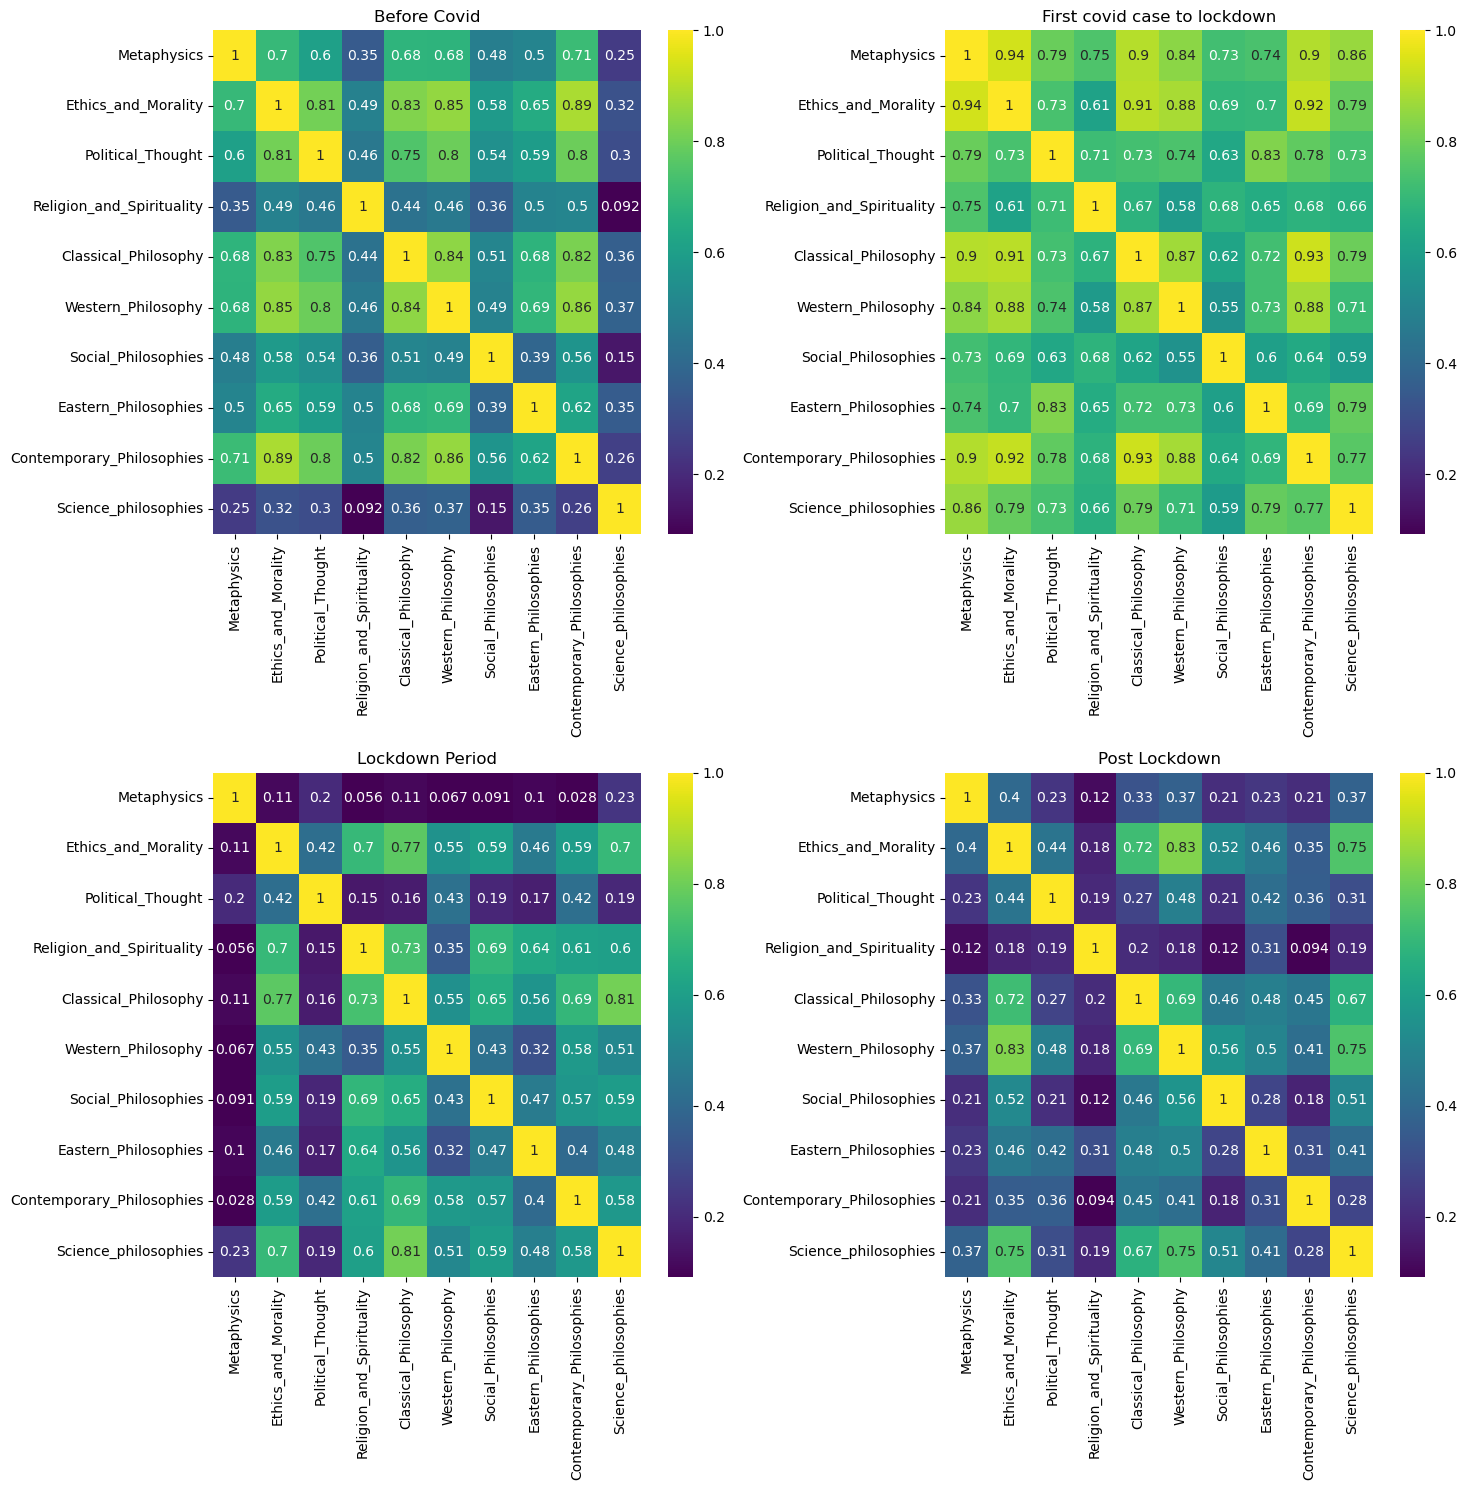

In [26]:
# Set the vmin and vmax parameters for consistent color gradient
vmin = correlations1_df.min().min()
vmax = correlations1_df.max().max()

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot the first correlation matrix with a sequential colormap
sns.heatmap(correlations1_df, annot=True, cmap='viridis', vmin=vmin, vmax=vmax, ax=axes[0, 0])
axes[0, 0].set_title('Before Covid')

# Plot the second correlation matrix with a sequential colormap
sns.heatmap(correlations2_df, annot=True, cmap='viridis', vmin=vmin, vmax=vmax, ax=axes[0, 1])
axes[0, 1].set_title('First covid case to lockdown')

# Plot the third correlation matrix with a sequential colormap
sns.heatmap(correlations3_df, annot=True, cmap='viridis', vmin=vmin, vmax=vmax, ax=axes[1, 0])
axes[1, 0].set_title('Lockdown Period')

# Plot the fourth correlation matrix with a sequential colormap
sns.heatmap(correlations4_df, annot=True, cmap='viridis', vmin=vmin, vmax=vmax, ax=axes[1, 1])
axes[1, 1].set_title('Post Lockdown')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Now plot time series of pageviews for topics that present some different behaviors, to get more intuition about what'a happening

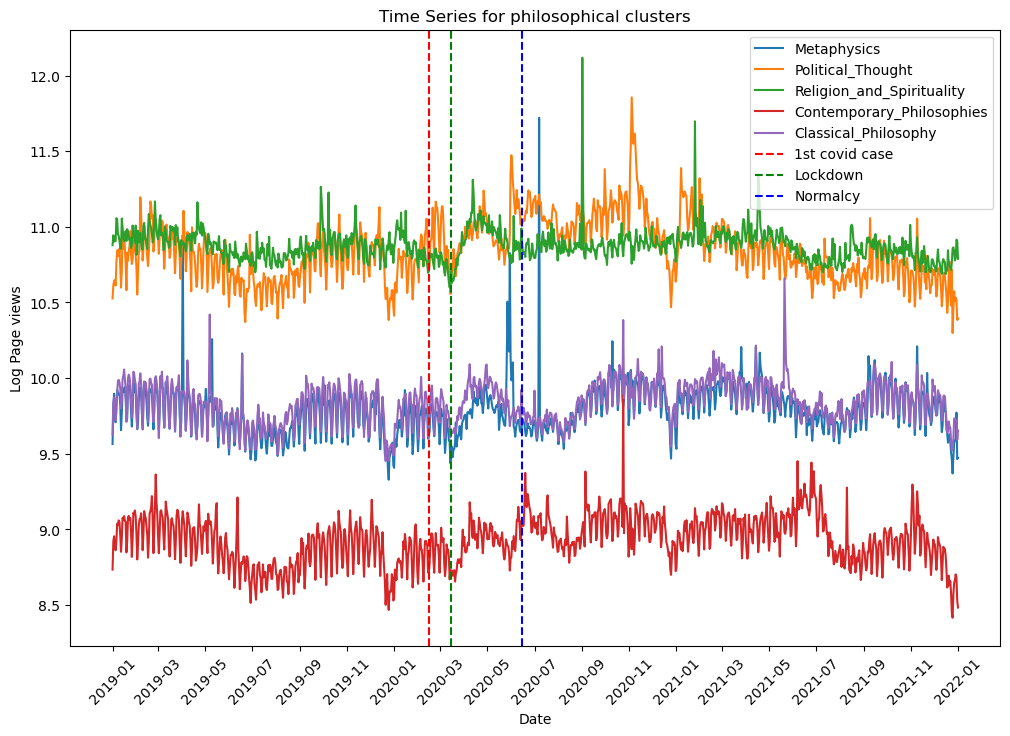

In [27]:
import matplotlib.dates as mdates

# Set the figure size
clusters_to_keep = ['Metaphysics', 'Political_Thought', 'Religion_and_Spirituality', 'Contemporary_Philosophies', 'Classical_Philosophy']

plt.figure(figsize=(12, 8))

# Iterate through the clusters
for cluster in clusters_to_keep:
    # Plot the log of the time series for each cluster
    plt.plot(cluster_views_with_timestamp['timestamp'], np.log(cluster_views_with_timestamp[cluster]), label=cluster)

# Add vertical lines for dates t0, t1, t2
plt.axvline(x=t0, color='red', linestyle='--', label='1st covid case')
plt.axvline(x=t1, color='green', linestyle='--', label='Lockdown')
plt.axvline(x=t2, color='blue', linestyle='--', label='Normalcy')

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Log Page views')

# Set the title
plt.title('Time Series for philosophical clusters views')

# Add a legend
plt.legend()

# Set the locator and formatter for the x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()